In [37]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
review = pd.read_csv("olist_order_reviews_dataset.csv")

In [3]:
order_item = pd.read_csv("olist_order_items_dataset.csv")

In [4]:
seller = pd.read_csv("olist_sellers_dataset.csv")

In [5]:
seller_order = seller.merge(order_item)

In [6]:
seller_order = seller_order.merge(review)

In [7]:
seller_order.head(10000)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,88980a9c50a6909fa1fe35ddab8fa1e2,5,NaN,NaN,2017-08-31 00:00:00,2017-08-31 21:37:39
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,b9b791819c5c1a5c6a4ffc7881f97fb5,1,NaN,"O pedido foi realizado no dia 5/5/2017, e até ...",2017-06-01 00:00:00,2017-06-01 12:57:10
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,cc77a6d63753c1d7b88b7c64630b97b9,3,NaN,coprei tres ítens faltou entregar um,2017-09-02 00:00:00,2017-09-03 17:31:14
3,8c16d1f32a54d92897cc437244442e1b,89023,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.90,26.68,cc77a6d63753c1d7b88b7c64630b97b9,3,NaN,coprei tres ítens faltou entregar um,2017-09-02 00:00:00,2017-09-03 17:31:14
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,27a894ac7d70600fd49d2ac3b910e65d,5,NaN,A cor é muito diferente da foto.\r\nÉ uma ótim...,2017-11-22 00:00:00,2017-11-23 02:14:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,a3a38f4affed601eb87a97788c949667,89204,joinville,SC,79a9149e58ce62bd439a996268d1c8f1,1,b4f3117dee543fec86ebc7bdbc0e2404,2017-05-05 00:32:18,159.90,16.33,91c75f2ce1fc9ae7641b474ab22869f4,5,NaN,NaN,2017-05-11 00:00:00,2017-05-12 21:14:54
9996,a3a38f4affed601eb87a97788c949667,89204,joinville,SC,7c5c8b715064d5bf2ee6a1cef59f2853,1,d5dceef582538ae853072860d4bff29e,2017-03-22 15:43:51,56.99,14.57,a30bf4ff92c02f23b909fda9c516d509,5,NaN,NaN,2017-03-24 00:00:00,2017-04-04 03:52:57
9997,a3a38f4affed601eb87a97788c949667,89204,joinville,SC,7da78752e9ddd817f22933c2763db33c,1,df5a9191c2465bb6f8538b6b3371e019,2017-12-11 18:53:23,69.90,18.06,e729c8b9e632bf9e7a90531b80baf8b9,5,NaN,NaN,2017-12-21 00:00:00,2017-12-26 11:47:38
9998,a3a38f4affed601eb87a97788c949667,89204,joinville,SC,7e131886d59cb8a02c847ed61228fd8c,1,fd9222f5293048868b832e5179fa3ec5,2017-03-24 18:25:04,49.90,11.74,5039b461b511a51f1730c572edafcf1c,5,NaN,NaN,2017-04-08 00:00:00,2017-12-26 17:29:36


In [33]:
seller_review = seller_order[["seller_id", "review_score"]]

In [34]:
seller_review.head(10000)

,seller_id,review_score
0,3442f8959a84dea7ee197c632cb2df15,5
1,3442f8959a84dea7ee197c632cb2df15,1
2,3442f8959a84dea7ee197c632cb2df15,3
3,8c16d1f32a54d92897cc437244442e1b,3
4,d1b65fc7debc3361ea86b5f14c68d2e2,5
...,...,...
9995,a3a38f4affed601eb87a97788c949667,5
9996,a3a38f4affed601eb87a97788c949667,5
9997,a3a38f4affed601eb87a97788c949667,5
9998,a3a38f4affed601eb87a97788c949667,5


In [35]:

seller_review['number_of_sales'] = seller_review['review_score']
seller_copy = seller_review
seller_review = seller_review.groupby('seller_id').agg({'review_score':'mean'})
seller_copy = seller_copy.groupby('seller_id').count()
seller_review['number_of_sales'] = seller_copy['number_of_sales']
seller_review.head(1000)

<ipython-input-35-d63934dab6d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_review['number_of_sales'] = seller_review['review_score']


,review_score,number_of_sales
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667,3
001cca7ae9ae17fb1caed9dfb1094831,3.874477,239
001e6ad469a905060d959994f1b41e4f,1.000000,1
002100f778ceb8431b7a1020ff7ab48f,3.982143,56
003554e2dce176b5555353e4f3555ac8,5.000000,1
...,...,...
527801b552d0077ffd170872eb49683b,4.445652,92
52831e5990d0771cb4951d6f12928167,3.000000,1
528bcf6680c36dddf07620bd35b33a6f,4.500000,2


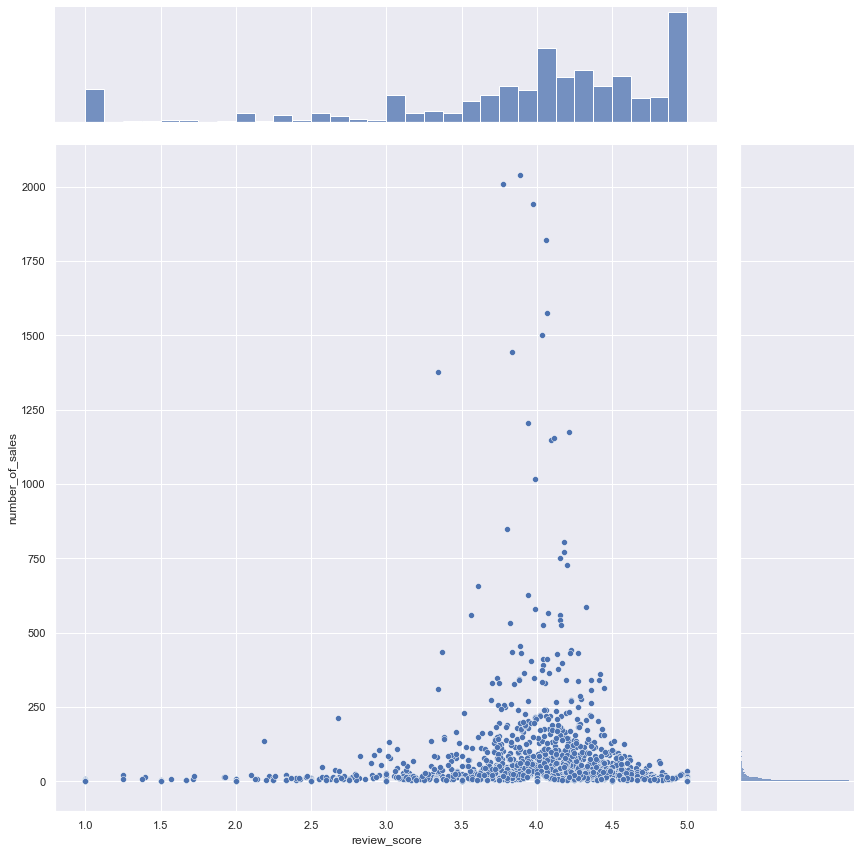

In [38]:
sb.jointplot(data = seller_review, x = "review_score", y = "number_of_sales", height = 12)

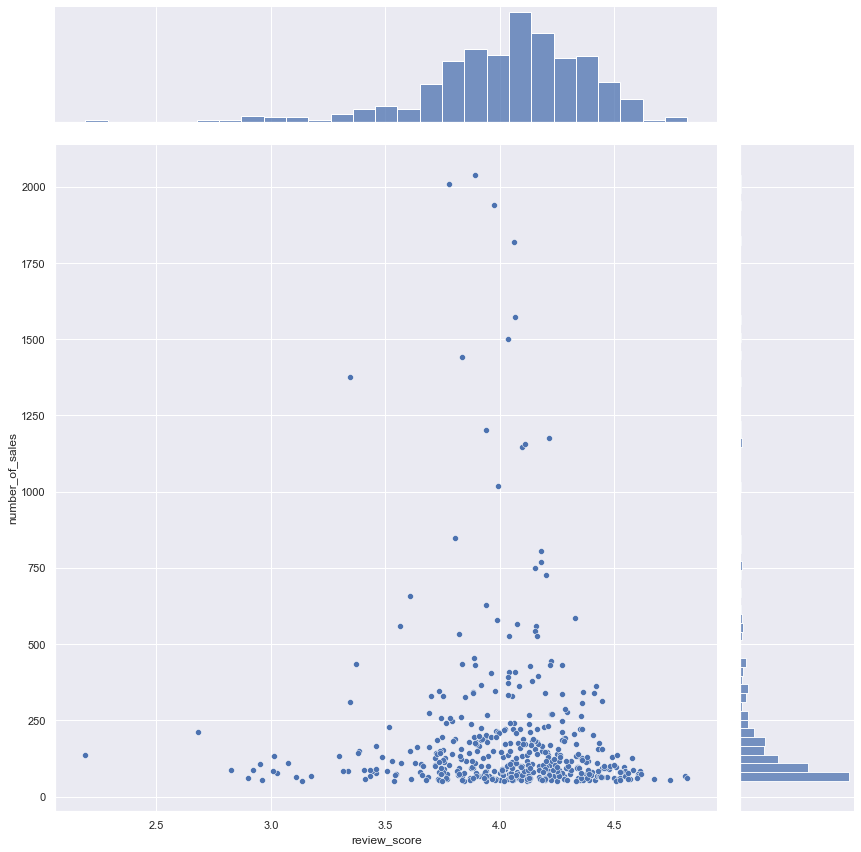

In [41]:
seller_review_unpacked = seller_review[seller_review['number_of_sales'] > 50]
sb.jointplot(data = seller_review_unpacked, x = "review_score", y = "number_of_sales", height = 12)
review = seller_review_unpacked['review_score']
sales = seller_review_unpacked['number_of_sales']
corr_check = pd.concat([review, sales], axis = 1).reindex(review.index)